In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [268]:
training_data = pd.read_csv("../Data/Working/training.csv")
training_data.head()

,date,home_team,away_team,home_score,away_score,home_team_victory,draw,tournament_name,city,country,neutral,scoring_team,scoring_player,minute,own_goal,penalty,shootout_required,first_shooter,winner
0,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Knut Kroon,7.0,False,False,False,NaN,NaN
1,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Lennart Bunke,10.0,False,False,False,NaN,NaN
2,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Bertil Ericsson,13.0,False,False,False,NaN,NaN
3,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Torsten Bunke,43.0,False,False,False,NaN,NaN
4,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Estonia,Leonhard Kass,47.0,False,False,False,NaN,NaN


In [269]:
training_data.value_counts("home_team")

home_team
Australia           349
Mexico              313
Venezuela           258
Luxembourg          253
Bolivia             246
                   ... 
Somalia               8
South Sudan           6
Saarland              5
Yemen DPR             5
Vietnam Republic      4
Name: count, Length: 217, dtype: int64

In [272]:
training_data.describe()

,home_score,away_score,minute
count,23719.000000,23719.000000,22592.000000
mean,2.694422,1.505080,49.885136
std,2.705966,1.812754,26.161996
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,28.000000
50%,2.000000,1.000000,51.000000
75%,4.000000,2.000000,73.000000
max,31.000000,17.000000,120.000000


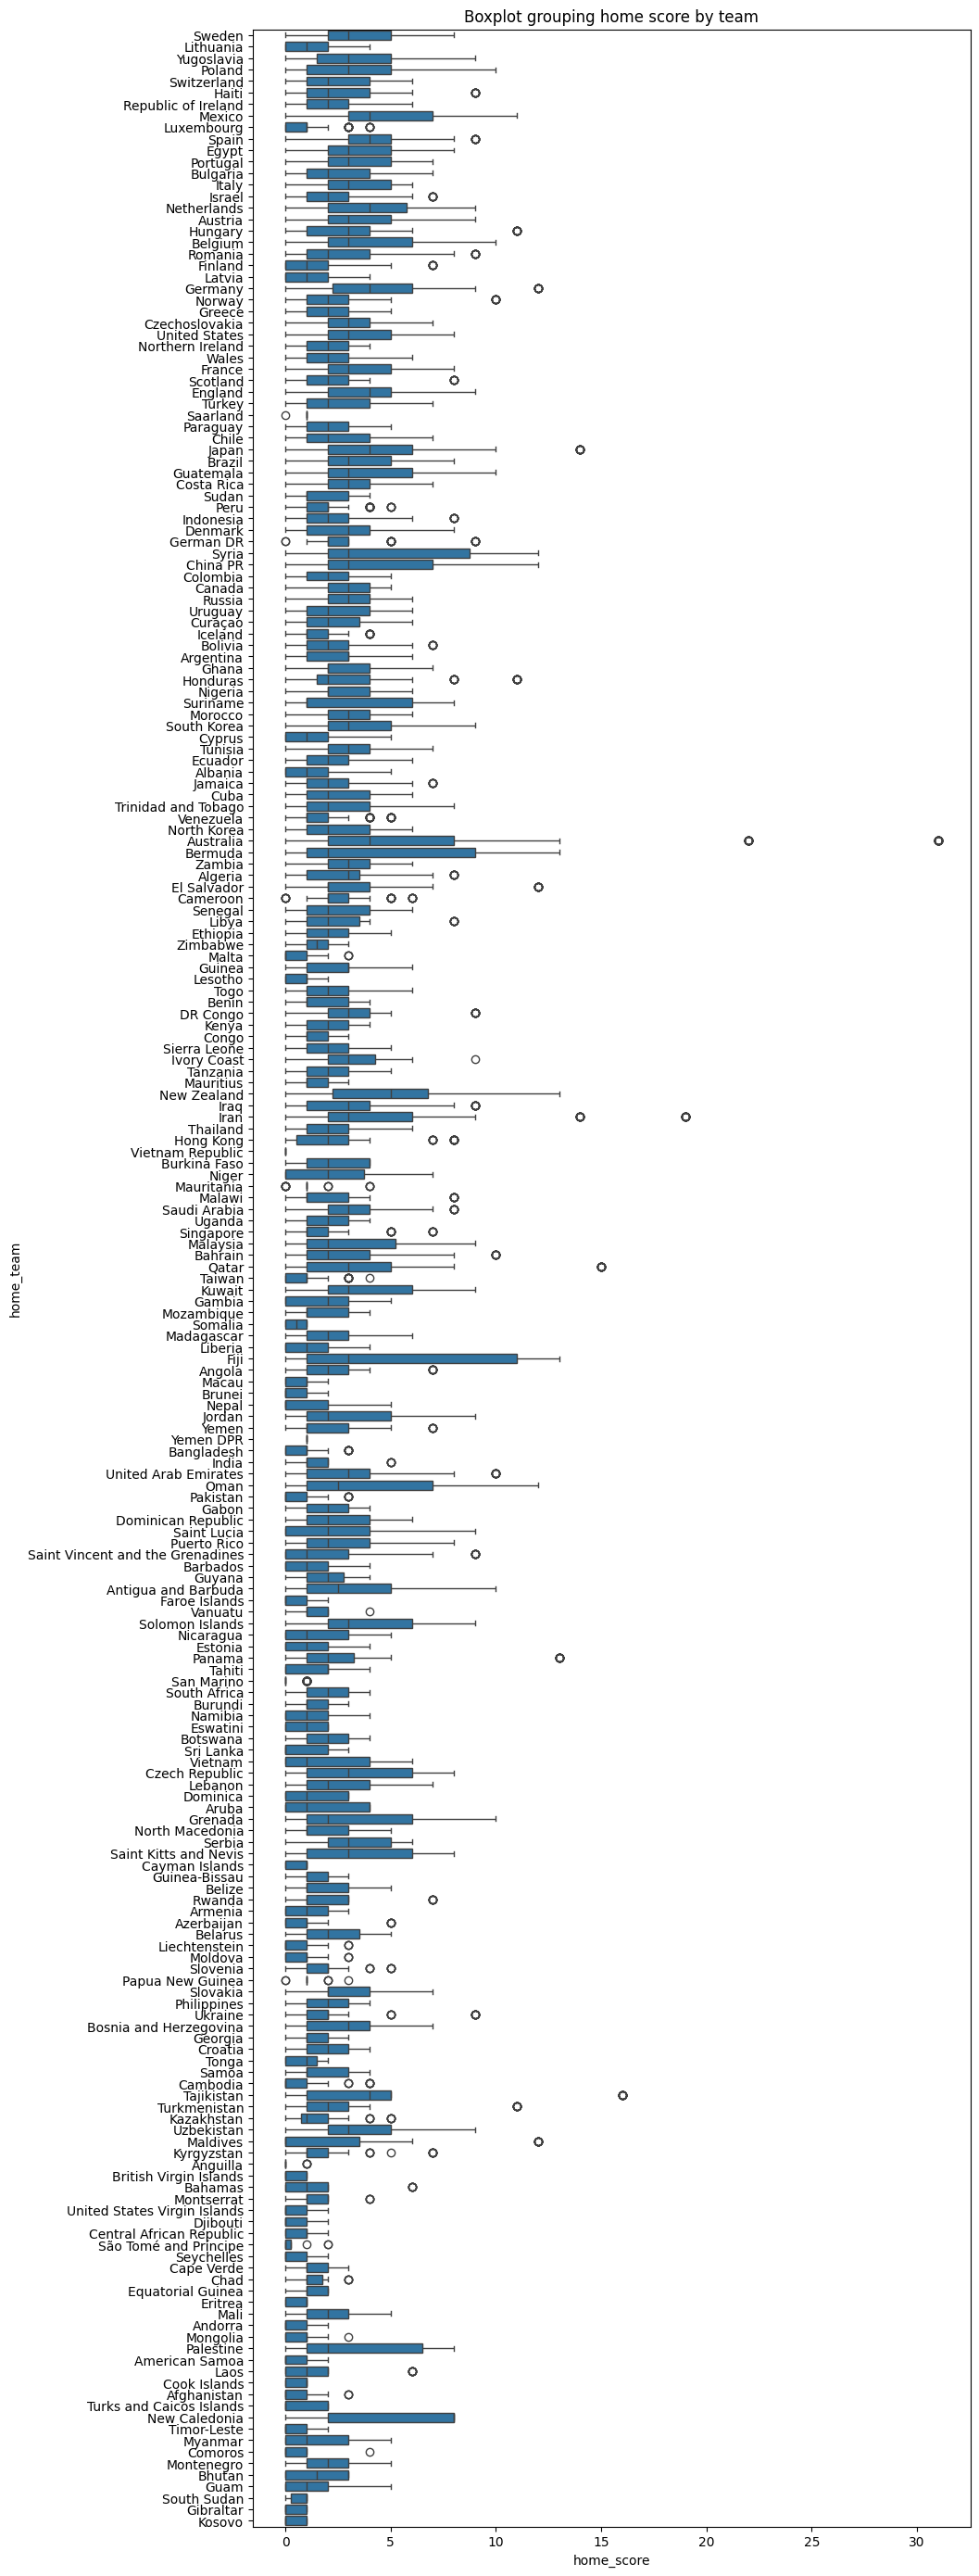

In [273]:
fig, ax0 = plt.subplots(1,1, figsize=[10,35])
sbn.boxplot(data=training_data, x="home_score", y="home_team", orient="h").set(title="Boxplot grouping home score by team")
plt.show()

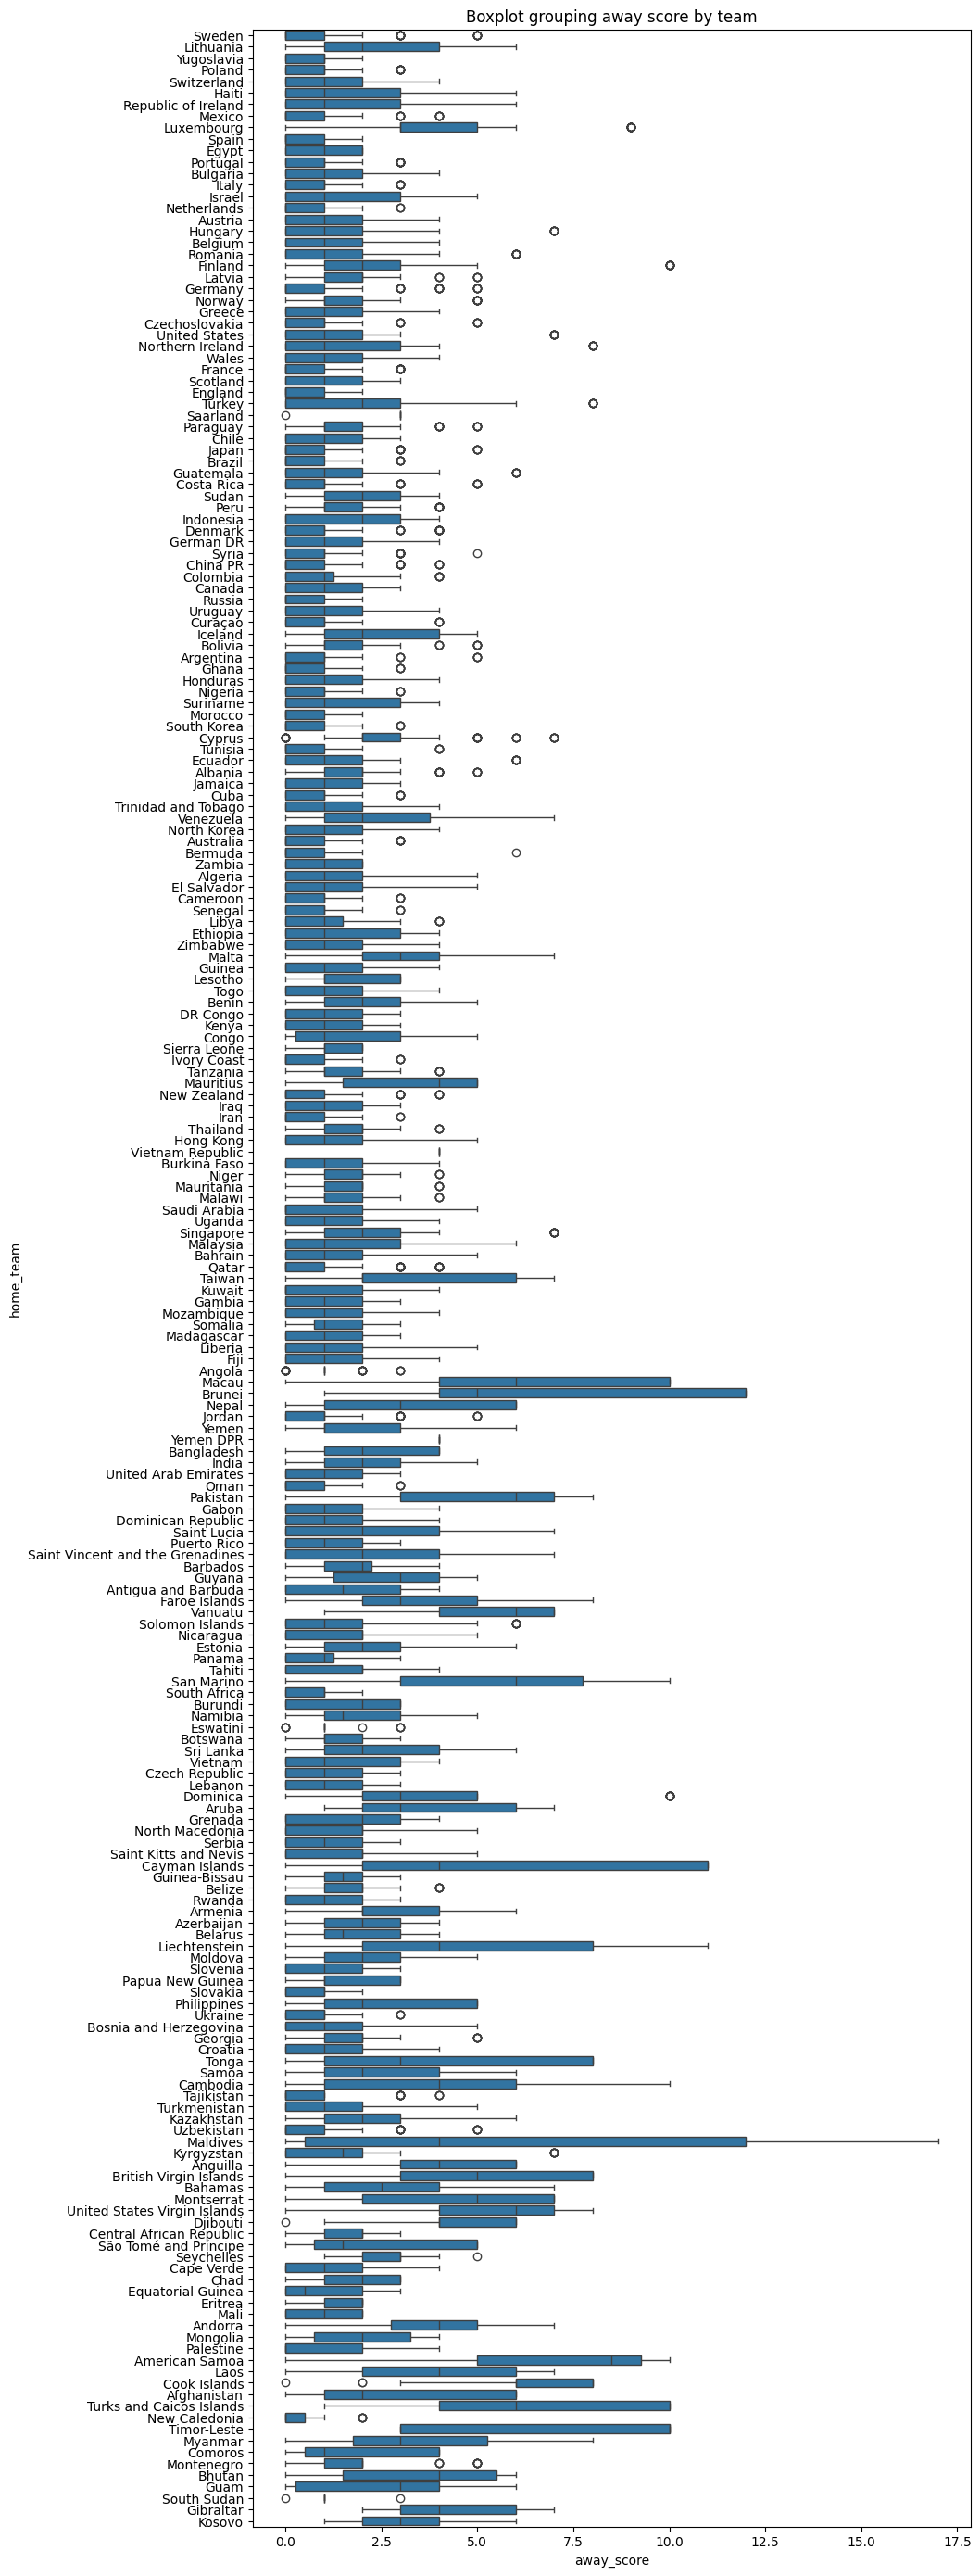

In [274]:
fig, ax0 = plt.subplots(1,1, figsize=[10,35])
sbn.boxplot(data=training_data, x="away_score", y="home_team", orient="h").set(title="Boxplot grouping away score by team")
plt.show()

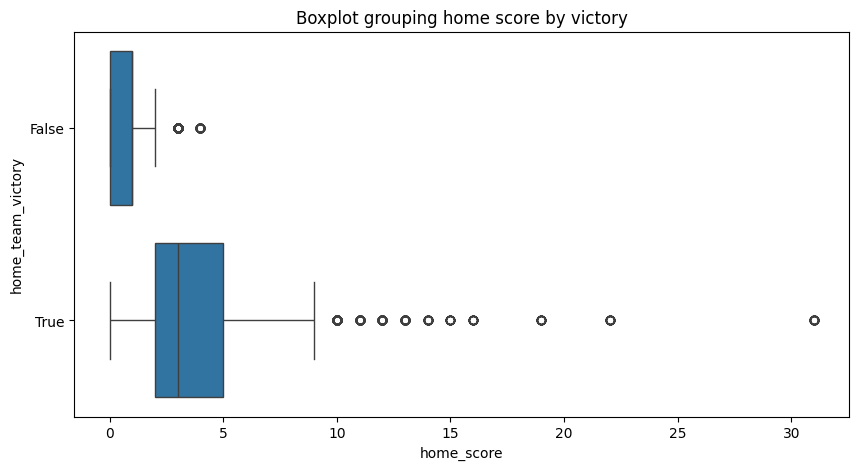

Home score correlation: 0.58


In [194]:
fig, ax0 = plt.subplots(1,1, figsize=[10,5])
sbn.boxplot(data=training_data, x="home_score", y="home_team_victory", orient="h").set(title="Boxplot grouping home score by victory")
plt.show()

print("Home score correlation:", round(np.corrcoef(training_data["home_team_victory"], training_data["home_score"])[0,1], 2))

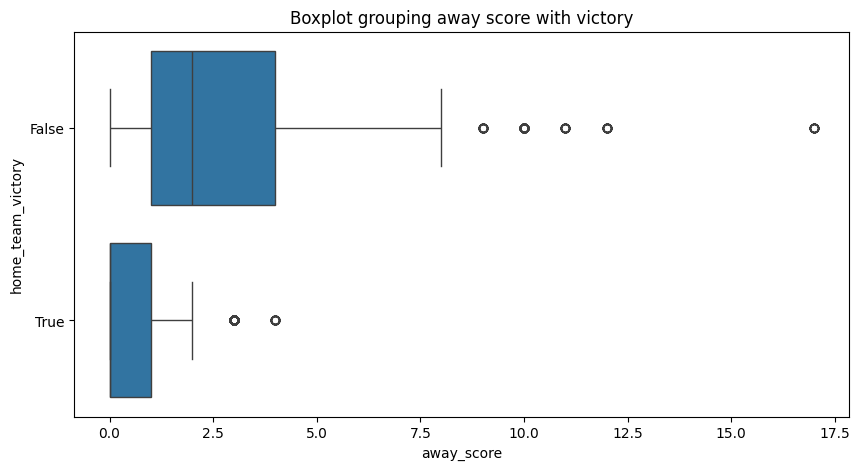

Away score correlation: -0.6


In [206]:
fig, ax0 = plt.subplots(1,1, figsize=[10,5])
sbn.boxplot(data=training_data, x="away_score", y="home_team_victory", orient="h").set(title="Boxplot grouping away score with victory")
plt.show()

print("Away score correlation:", round(np.corrcoef(training_data["home_team_victory"], training_data["away_score"])[0,1], 2))

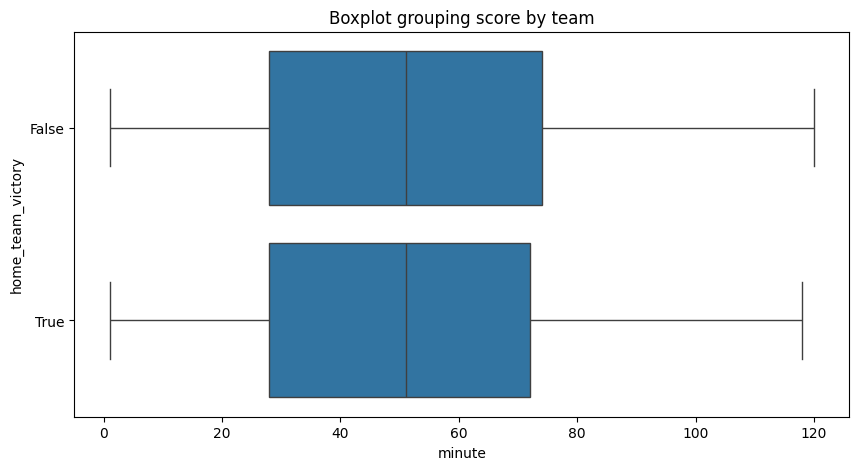

Minute correlation: -0.01


In [ ]:
minute_data = training_data.loc[training_data["minute"].notnull()]

fig, ax0 = plt.subplots(1,1, figsize=[10,5])
sbn.boxplot(data=minute_data, x="minute", y="home_team_victory", orient="h").set(title="Boxplot grouping scoring minute with victory")
plt.show()

print("Minute correlation:", round(np.corrcoef(minute_data["home_team_victory"], minute_data["minute"])[0,1], 2))

In [284]:
f, t = training_data.value_counts("penalty")
print("percentage of goals that were penalty shots:", round(100 * t / (t+f), 2))

percentage of goals that were penalty shots: 6.23


In [287]:
f, t = training_data.value_counts("own_goal")
print("percentage of goals that were own goals:", round(100 * t / (t+f), 2))

percentage of goals that were own goals: 1.58


In [286]:
f, t = training_data.value_counts("neutral")
print("percentage of games played on neutral turf:", round(100 * t / (t+f), 2))

percentage of games played on neutral turf: 9.41


In [288]:
team_names = training_data["home_team"].unique()

team_stats = pd.DataFrame(columns=["team", "win", "draw", "loss"])

for team in team_names:
    df = training_data.loc[training_data["home_team"] == team]
    total_wins = np.sum(df["home_team_victory"])
    total_draws = np.sum(df["draw"])
    total_losses = len(df) - total_wins - total_draws

    team_stats.loc[len(team_stats)] = [team, total_wins, total_draws, total_losses]

team_stats

,team,win,draw,loss
0,Sweden,179,16,26
1,Lithuania,31,13,55
2,Yugoslavia,75,14,6
3,Poland,152,29,27
4,Switzerland,109,45,31
...,...,...,...,...
212,Bhutan,5,0,17
213,Guam,9,1,16
214,South Sudan,0,5,1
215,Gibraltar,0,0,44


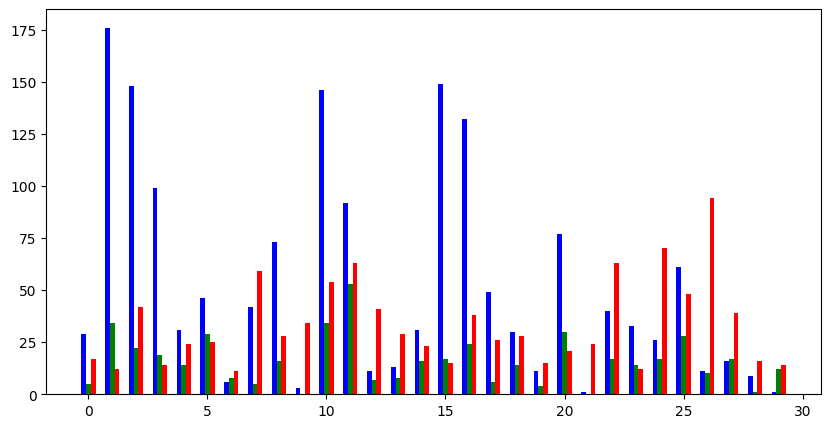

In [289]:
sample = team_stats.sample(n=30)
sample.reset_index(drop=True, inplace=True)

fix, ax = plt.subplots(1, 1, figsize=[10, 5])
ax.bar(sample.index - 0.2, sample["win"], width=0.2, color="b", align="center")
ax.bar(sample.index, sample["draw"], width=0.2, color="g", align="center")
ax.bar(sample.index + 0.2, sample["loss"], width=0.2, color="r", align="center")

plt.show()

In [290]:
training_data.head()

,date,home_team,away_team,home_score,away_score,home_team_victory,draw,tournament_name,city,country,neutral,scoring_team,scoring_player,minute,own_goal,penalty,shootout_required,first_shooter,winner
0,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Knut Kroon,7.0,False,False,False,NaN,NaN
1,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Lennart Bunke,10.0,False,False,False,NaN,NaN
2,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Bertil Ericsson,13.0,False,False,False,NaN,NaN
3,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Sweden,Torsten Bunke,43.0,False,False,False,NaN,NaN
4,1933-06-11,Sweden,Estonia,6,2,True,False,FIFA World Cup qualification,Stockholm,Sweden,False,Estonia,Leonhard Kass,47.0,False,False,False,NaN,NaN
